# Theme of this notebook - How to visualize population data
* Let's practice throughout solving sample questions

In [18]:
# Import libraries and load data
import pandas as pd
df = pd.read_csv('stat-008_nc-est2015-agesex-res.csv')
df.head()

,SEX,AGE,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015
0,0,0,3944153,3944160,3951330,3963087,3926540,3931141,3949775,3978038
1,0,1,3978070,3978090,3957888,3966551,3977939,3942872,3949776,3968564
2,0,2,4096929,4096939,4090862,3971565,3980095,3992720,3959664,3966583
3,0,3,4119040,4119051,4111920,4102470,3983157,3992734,4007079,3974061
4,0,4,4063170,4063186,4077551,4122294,4112849,3994449,4005716,4020035


# Problem 1
This homework assignment involves writing the Python code to do the following using the dataset.
1. Compute the population annual percent growth from 2010 to 2015 for every age group (age
code = 0 to 999) and gender (sex code = 0-2).
2. Sort the table (descending order) created in step number 1 displaying the group with the highest
population growth on the top. Which age group has the highest growth between 2010 and 2015.

In [19]:
# Problem1-1
df_p1 = df.loc[:,["SEX","AGE","CENSUS2010POP","POPESTIMATE2015"]]
df_p1['CHANGE'] = df_p1["POPESTIMATE2015"] - df_p1["CENSUS2010POP"]
df_p1['TOTAL GROWTH(%)'] = round((df_p1["CHANGE"] / df_p1["CENSUS2010POP"])*100,2)
df_p1['ANNUAL GROWTH(%)'] = round(((df_p1["POPESTIMATE2015"] / df_p1["CENSUS2010POP"])**(1/5) - 1)*100,2)
df_p1 =df_p1.rename(columns={'CENSUS2010POP': '2010','POPESTIMATE2015': '2015'})

In [20]:
df_p1.head()

,SEX,AGE,2010,2015,CHANGE,TOTAL GROWTH(%),ANNUAL GROWTH(%)
0,0,0,3944153,3978038,33885,0.86,0.17
1,0,1,3978070,3968564,-9506,-0.24,-0.05
2,0,2,4096929,3966583,-130346,-3.18,-0.64
3,0,3,4119040,3974061,-144979,-3.52,-0.71
4,0,4,4063170,4020035,-43135,-1.06,-0.21


In [21]:
# Problem1-2
df_p1 = df_p1.sort_values(by='ANNUAL GROWTH(%)',ascending=False)
df_p1

,SEX,AGE,2010,2015,CHANGE,TOTAL GROWTH(%),ANNUAL GROWTH(%)
202,1,100,9162,15088,5926,64.68,10.49
200,1,98,9259,14719,5460,58.97,9.71
199,1,97,14556,23092,8536,58.64,9.67
201,1,99,6073,9577,3504,57.70,9.54
196,1,94,43531,68135,24604,56.52,9.37
...,...,...,...,...,...,...,...
252,2,48,2301062,2062616,-238446,-10.36,-2.16
251,2,47,2297017,2054083,-242934,-10.58,-2.21
141,1,39,2167405,1926578,-240827,-11.11,-2.33
39,0,39,4364796,3870862,-493934,-11.32,-2.37


# Problem 2
Generate the following plot which proves the assertion that females live longer than males.

Procedure to do this project:
1. Load the libraries + read the data file.
2. Retrieve and relabel the relevant columns (Sex, Age, 2010, 2015) (us_pop)<br><br>
Steps 3,4,5<br>
3. Compute the change and total growth in population from 2010 to 2015 for all ages.
4. Add the change’ and ‘total growth’ to the table (Sex, Age, 2010, 2015, Change, Total Growth)
(census)
5. Sort the ‘census’ table by the amount of ‘change’ in descending order. (census.sort(‘Change’))<br><br>
Steps 6,7: Annual Growth rate computation<br>
6. Compute the ‘annual’ growth rate’ from 2010 to 2015 for all ages and add to the ‘census’ table.
7. Sort the ‘census’ table by annual total growth.<br><br>
Steps 8 – 12: Male female life expectancy<br>
8. Retrieve 2015 population for males and females.
Drop 2010 population data.
Select where Age is below ‘999’ (Remove all ages)
Select where ‘Sex’ is above ‘0’ (Remove all sexes)
9. Select population for males.
10. Select population for females.
11. Combine population for males and females in a single Pandas DataFrame.
12. Create a line plot for male and female population for 2015.

In [22]:
# 1. Load the libraries + read the data file.
# 2. Retrieve and relabel the relevant columns (Sex, Age, 2010, 2015) (us_pop)

import matplotlib.pyplot as plt
df = pd.read_csv('stat-008_nc-est2015-agesex-res.csv')
census = df.loc[:,["SEX","AGE","CENSUS2010POP","POPESTIMATE2015"]]

In [23]:
# Steps 3,4,5
# 3. Compute the change and total growth in population from 2010 to 2015 for all ages.
# 4. Add the change’ and ‘total growth’ to the table (Sex, Age, 2010, 2015, Change, Total Growth) (census)
# 5. Sort the ‘census’ table by the amount of ‘change’ in descending order. (census.sort(‘Change’))
census['CHANGE'] = census["POPESTIMATE2015"] - census["CENSUS2010POP"]
census['TOTAL GROWTH(%)'] = round((census["CHANGE"] / census["CENSUS2010POP"])*100,2)
census =census.rename(columns={'CENSUS2010POP': '2010','POPESTIMATE2015': '2015'})
census = census.sort_values(by='CHANGE',ascending=False)
census.head()

,SEX,AGE,2010,2015,CHANGE,TOTAL GROWTH(%)
101,0,999,308745538,321418820,12673282,4.10
203,1,999,151781326,158229297,6447971,4.25
305,2,999,156964212,163189523,6225311,3.97
68,0,68,2323672,3436357,1112685,47.88
64,0,64,2657131,3536156,879025,33.08


In [24]:
# Steps 6,7: Annual Growth rate computation
# 6. Compute the ‘annual’ growth rate’ from 2010 to 2015 for all ages and add to the ‘census’ table.
# 7. Sort the ‘census’ table by annual total growth.
census['ANNUAL GROWTH(%)'] = round(((census["2015"] / census["2010"])**(1/5) - 1)*100,2)
census = census.sort_values(by='ANNUAL GROWTH(%)',ascending=False)
census.head()

,SEX,AGE,2010,2015,CHANGE,TOTAL GROWTH(%),ANNUAL GROWTH(%)
202,1,100,9162,15088,5926,64.68,10.49
200,1,98,9259,14719,5460,58.97,9.71
199,1,97,14556,23092,8536,58.64,9.67
201,1,99,6073,9577,3504,57.70,9.54
196,1,94,43531,68135,24604,56.52,9.37


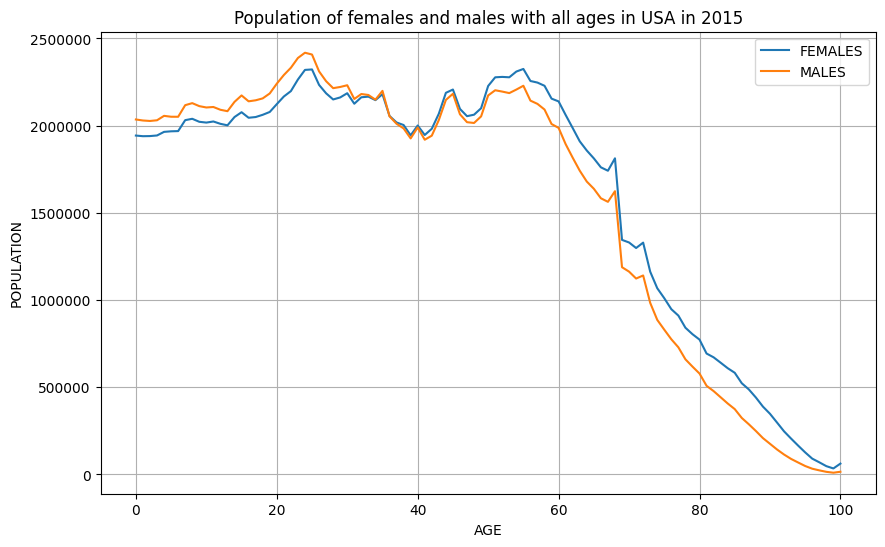

In [25]:
# Steps 8 – 12: Male female life expectancy
# 8. Retrieve 2015 population for males and females.
# Drop 2010 population data.
# Select where Age is below ‘999’ (Remove all ages)
# Select where ‘Sex’ is above ‘0’ (Remove all sexes)

census2 = df.loc[:,["SEX","AGE","POPESTIMATE2015"]]
census2 = census2[census2["AGE"] < 999]
census2 = census2[census2["SEX"] > 0]

# 9. Select population for males.
# 10. Select population for females.
men_2015 = census2[census2["SEX"] == 1]
men_2015 = men_2015.rename(columns={'POPESTIMATE2015': 'MALES'})
women_2015 = census2[census2["SEX"] == 2]
women_2015 = women_2015.rename(columns={'POPESTIMATE2015': 'FEMALES'})

# 11. Combine population for males and females in a single Pandas DataFrame.
# 12. Create a line plot for male and female population for 2015.
men_2015 = men_2015.drop("SEX", axis=1)
women_2015 = women_2015.drop("SEX", axis=1)
population_2015 = pd.merge(women_2015, men_2015, on='AGE')

fig = population_2015.plot(x="AGE", figsize=(10,6))
plt.ylabel('POPULATION')
plt.ticklabel_format(style="plain",  axis="y")
plt.title('Population of females and males with all ages in USA in 2015')
plt.grid()
plt.show()

In [9]:
#---End---